In [ ]:
# ESTIMATE THE FINAL NUMBER OF (CONFIRMED) CASES FOR COVID-19 VIRUS
# data: until 16/04/2020
# author: Manthos Vogiatzoglou
# contact at: vogia.m@gmail.com

# add packages
import Pkg; 
Pkg.add("LsqFit")
Pkg.add("DataFrames")
Pkg.add("XLSX")
Pkg.add("DifferentialEquations")
Pkg.add("Optim")
Pkg.add("NLSolversBase")
Pkg.add("Plots")
Pkg.add("GR")

In [1]:
# update packages
using Pkg
Pkg.update()

   Updating registry at `C:\Users\ManthosPc\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %% %Fetching: [=======>                                 ]  17.3 %===========>                             ]  25.7 %===========>                             ]  26.2 % %>                         ]  35.3 %.3 % % %.6 %.1 % %7 %.4 %61.0 %]  61.2 %               ]  62.1 %==========================>              ]  62.7 %]  63.3 %]  63.4 %]  63.9 %.2 % %.6 %.3 %=============================>           ]  72.1 % [==============================>          ]  74.2 %================================>        ]  78.9 %.3 %Fetching: [==================================>      ]  82.8 % [==================================>      ]  83.5 % [===================================>     ]  86.4 % %Fetching: [====================================>    ]  88.9 %.9 %0 %

  Installed NLopt ────────────────────── v0.6.4
  Installed Roots ────────────────────── v1.3.14
  Installed GLPK ─────────────────────── v0.15.3
  Installed ForwardDiff ──────────────── v0.10.25
  Installed HypothesisTests ──────────── v0.10.6
  Installed Ipopt ────────────────────── v0.9.1
  Installed SCS ──────────────────────── v0.8.2
  Installed PyPlot ───────────────────── v2.10.0
  Installed JSON ─────────────────────── v0.21.2
  Installed StatsBase ────────────────── v0.33.14
  Installed Plots ────────────────────── v1.6.8
  Installed JuMP ─────────────────────── v0.22.2
  Installed Gadfly ───────────────────── v1.3.4
  Installed CSV ──────────────────────── v0.10.2
  Installed DifferentialEquations ────── v6.18.0
  Installed XLSX ─────────────────────── v0.7.8
  Installed DataFrames ───────────────── v1.3.2
  Installed GLM ──────────────────────── v1.6.1
  Installed NameResolution ───────────── v0.1.5
  Installed Parsers ──────────────────── v2.2.1
  Installed MathOptInterface

  Installed OffsetArrays ─────────────── v1.10.8
  Installed LogExpFunctions ──────────── v0.3.0
  Installed LibSSH2_jll ──────────────── v1.9.0+3
  Installed StatsAPI ─────────────────── v1.2.0
  Installed Widgets ──────────────────── v0.6.4
  Installed DiffEqBase ───────────────── v6.64.0
  Installed MutableArithmetics ───────── v0.3.2
  Installed SimpleTraits ─────────────── v0.9.4
  Installed PlotUtils ────────────────── v1.0.15
  Installed BandedMatrices ───────────── v0.15.15
  Installed Observables ──────────────── v0.4.0
  Installed ColorTypes ───────────────── v0.11.0
  Installed FFMPEG ───────────────────── v0.4.1
  Installed LabelledArrays ───────────── v1.6.6
  Installed RecipesBase ──────────────── v1.2.1
  Installed JuliaVariables ───────────── v0.2.4
  Installed FiniteDiff ───────────────── v2.10.0
  Installed CategoricalArrays ────────── v0.10.2
  Installed IndirectArrays ───────────── v1.0.0
  Installed IfElse ───────────────────── v0.1.1
  Installed RandomNumbers ────

  [2ab3a3ac] + LogExpFunctions v0.3.0
  [d8e11817] + MLStyle v0.4.10
  [1914dd2f] ↑ MacroTools v0.5.6 ⇒ v0.5.9
  [b8f27783] ↑ MathOptInterface v0.9.20 ⇒ v0.10.7
  [e1d29d7a] ↑ Missings v0.4.5 ⇒ v1.0.2
  [961ee093] ↓ ModelingToolkit v5.14.0 ⇒ v2.0.0
  [14a3606d] + MozillaCACerts_jll v2021.1.19+0
  [d8a4904e] ↑ MutableArithmetics v0.2.16 ⇒ v0.3.2
  [76087f3c] ↑ NLopt v0.6.2 ⇒ v0.6.4
  [872c559c] ↓ NNlib v0.7.17 ⇒ v0.7.9
  [77ba4419] ↑ NaNMath v0.3.5 ⇒ v0.3.7
  [71a1bf82] + NameResolution v0.1.5
  [ca575930] + NetworkOptions v1.2.0
  [8913a72c] ↑ NonlinearSolve v0.3.8 ⇒ v0.3.11
  [510215fc] ↑ Observables v0.3.3 ⇒ v0.4.0
  [6fe1bfb0] ↑ OffsetArrays v1.6.2 ⇒ v1.10.8
  [efe28fd5] - OpenSpecFun_jll v0.5.3+4
  [bac558e1] ↑ OrderedCollections v1.4.0 ⇒ v1.4.1
  [1dea7af3] ↑ OrdinaryDiffEq v5.52.3 ⇒ v5.55.1
  [65888b18] ↓ ParameterizedFunctions v5.10.0 ⇒ v5.6.0
  [d96e819e] ↑ Parameters v0.12.2 ⇒ v0.12.3
  [69de0a69] ↑ Parsers v1.1.0 ⇒ v2.2.1
  [995b91a9] ↑ PlotUtils v1.0.10 ⇒ v1.0.15
  [91a5bcdd

In [1]:
# load nececcary packages
using DataFrames
using XLSX
using DifferentialEquations, Optim, NLSolversBase

In [59]:
# LOAD DATA
# read the excel file where data is stored
data_dir = joinpath(@__DIR__, "data");
excel_df = DataFrame(XLSX.readtable(joinpath(data_dir, "covid19_UK_1604.xlsx"), "UK")...);

# filter the data, so that totalCases(1)>20
data = filter(row -> row.totalCases>20, excel_df);

cases = data[!,2]
deaths = data[!,3]
tC =data[!,4];
tD = data[!,5];
# extract the total Cases column and convert it to float, this is the data set
tC = convert(Array{Float64,1}, tC);

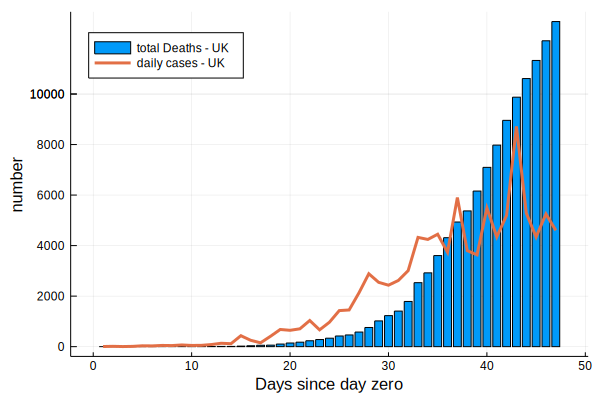

In [60]:
# plot total number of deaths and daily number of confirmed cases
using Plots
plot(tD,seriestype = :bar,xlabel="Days since day zero",ylabel="number",label = "total Deaths - UK",legend=:topleft)
plot!(cases,seriestype = :line,label = "daily cases - UK",lw=3)

In [61]:
# Define the error function
# We want to estimate b,g and S0 parameters of the SIR equations
# We are doing so by minimizing the sum of squares between tCm (total cases defined by the SIR model) and 
# tC (confirmed total cases, our data). This is our error function

function SIRODEerror(theta::Array{Float64},tC::Array{Float64},weights::Union{Float64,Int64,Array{Float64}})
# Error function
# INPUTS:
# theta: 3 element vector of the form [S0,b,g]
# tC:    array of data (total cases)
# weights: array with length equal to n = length(tC), or 2 element array or real number. 
#        if weigths in n - dimensional array the squared difference between real and SIR data in the i-th
#        position is multiplied by weights[i]
#        if weights is two dimensional array each of the values in weigths is multiplied by squares of 
#        differences in both real values and first derivatives 
#        if weights is a real number the previous case is employed, with weights = [0.5,0.5]
#        if sum(weights)~=1.0 then weights[i] = weights[i]/sum(weights)

    params = theta[1:2]
    S0 = theta[3]
    I0 = tC[1]
    
    ic = [S0,I0,0];
    
    n = length(tC)/1.0;
    function sir_ode(du,u,p,t)
        S,I,R = u
        N = S + I + R
        b,g = p
        du[1] = -b*S*I/N
        du[2] = b*S*I/N-g*I
        du[3] = g*I
    end

    tspan = (0.0,n-1)
    sir_prob = ODEProblem(sir_ode,ic,tspan,params)
    sir_sol = solve(sir_prob,saveat = 1,maxiters = 1e7, abstol = 1e-8, reltol = 1e-7)
    tCm = sir_sol[2,:] + sir_sol[3,:]

    
    if isa(weights, Vector) == 1 || isempty(weights)==1
        w1 = weights[1]/(weights[1]+weights[2])
        w2 = weights[2]/(weights[1]+weights[2])
        ddat = diff(tC);
        dtCm = diff(tCm);
    
        error = w1*sum((tC - tCm).^2) + w2*sum((ddat - dtCm).^2)
    else
        weights = 2*collect(1:n)/(n*(n+1))
        error = sum(weights.*(tC - tCm).^2)
    end
    
return error
end

# theta = [2.456,2.353,8.24*10^5]
# SIRODEerror(theta,tC,1)

SIRODEerror (generic function with 1 method)

In [1]:
# optimization routine
# minimize the error function and print results
n = length(tC)
theta = [0.556,0.553,1.24*10^5]  # change this accordingly. The algorithm is sensitive to starting values
weights =ones(n)/n               # that too
# other possible values for weights
# weights = 1 ---> equal to: weights = [0.5,0.5]
# weights = 2*collect(1:n)/(n*(n+1)) to benefit the latest observations
# weights = [0.9,0.1]
opt = optimize(vars -> SIRODEerror(vars,tC,weights), theta, Optim.Options(f_tol = 1e-12,x_tol=10^(-8),iterations = 50000,store_trace = true,show_trace = false))

parameters = Optim.minimizer(opt)

SIRODEparams = parameters[1:2]
S0 = parameters[3]

SIRERROR_opt = Optim.minimum(opt)

println("SIR model parameters b and g: ",SIRODEparams)
println("SIR model initial susceptibles: ",S0)
println("SIR error opt value: ",SIRERROR_opt)

summary(opt)

UndefVarError: UndefVarError: tC not defined

In [46]:
# the solution to the SIR system of differential equations

function sir(theta::Array{Float64},data::Array{Float64},tspan::Float64)
# the solution to the SIR system of differential equations
# INPUTS
# theta: array of the form [S0,b,g]
# data:  the data set
# tspan: positive real, the number of time periods ahead
    
    params = theta[1:2]
    S0 = theta[3]
    I0 = data[1]
    if data[1] == 0
        error("data[1] should be positive")
    end
    
    ic = [S0,I0,0];
    
    n = length(data)/1.0;
    function sir_ode(du,u,p,t)
        S,I,R = u
        N = S + I + R
        b,g = p
        du[1] = -b*S*I/N
        du[2] = b*S*I/N-g*I
        du[3] = g*I
    end

    tspan = (0.0,tspan)
    sir_prob = ODEProblem(sir_ode,ic,tspan,params)
    sir_sol = solve(sir_prob,saveat = 1,maxiters = 1e7, abstol = 1e-8, reltol = 1e-7)    
end   

# run the function

# obtain solution from SIR. tspan equals 120, approximately 4 months since day zero
sir_sol2 = sir(parameters,tC,120.0)

# calculate total cases implied by the model
tCm = sir_sol2[2,:] + sir_sol2[3,:]
Rinf = tCm[end]
println("Final number of cases:",round(Rinf))


Final number of cases:2604.0


In [47]:
using Plots
gr()

Plots.GRBackend()

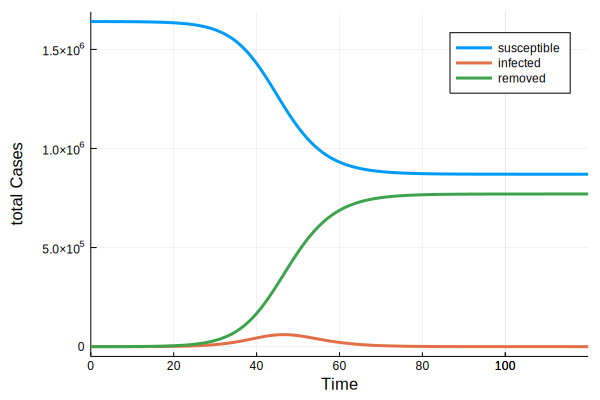

In [8]:
# plot SIR solution 
plot(sir_sol2,xlabel="Time",ylabel="total Cases",label = ["susceptible" "infected" "removed"], lw = 3)

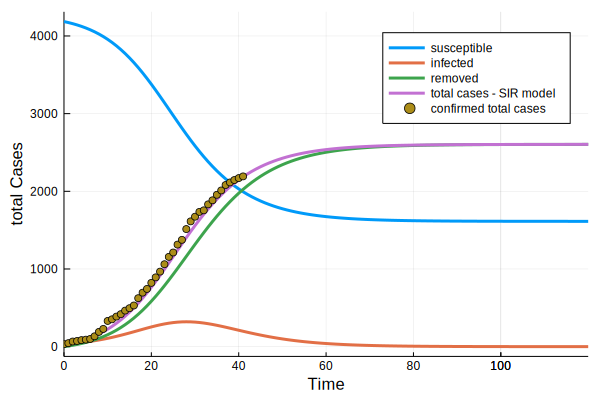

In [48]:
# the actual plotting
# Plot best - fit SIR with actual data 

plot(sir_sol2,xlabel="Time",ylabel="total Cases",label = ["susceptible" "infected" "removed"], lw = 3)
plot!(tCm,label = "total cases - SIR model", lw = 3)
t = [0:1:length(tC)-1]
plot!(t, tC, seriestype = :scatter,label = "confirmed total cases")

In [49]:
# Logistic curve fit to total Cases data, with least squares
# logistic function :  f(x;a,b,c) = a*(1+b*exp(-c*x))^(-1)
# There are two options for fitting the logistic function parameters, a,b and c
# Option 1: Fix a to the value implied by the SIR model. Then p0 is [b,c] and a == Rinf
# Option 2: Estimate all three from data. Then p0 = [a,b,c]


using LsqFit

function LogisticCurveFit(data::Array{Float64},p0::Array{Float64},ww::Union{Float64,Int64,Array{Float64}},Rinf::Float64)
# INPUTS
# data: Array of data (total Cases)
# p0:   initial values for the parameters, either 2 or 3 element vector
# ww:   weights for the fitting. Either a real number, in that cases weights are equal, or vector with size length(data)
#       whos elements sum to 1.0
# Rinf: The final number of cases. If length(p0) = 3 then Rinf = []
    
    l = length(p0)
    if l<2 || l>3
        error("params is a vector with either two or three elements")
    end
    
    if l == 2 && isempty(Rinf)
        error("If length(p0) = 2 the function should have 4 input arguments")
    end
    
    n = length(data)
    if isempty(ww)==1 || isreal(ww)
        ww = collect(1:n)/n
    elseif isa(ww, Vector) == 1 && length(ww) == n && sum(ww) ~= 1.0
        println("weights don't sum to 1. new_weights[i] = old_weights[i]/sum(weights)")
        ww = ww/sum(ww)
    elseif isa(ww, Vector) == 1 && length(ww) ~= n
        error("weights should be an empty vector of a vector on length equal to length(data)")
    end
    
    xdata = collect(0:n-1)
    ydata = data
    
    if l == 3
        @. model(x, p) = p[1]./(1+p[2]*exp(-x*p[3]))

        function jacobian_model(x,p)
            J = Array{Float64}(undef, length(x), length(p))
            @. J[:,1] =1 ./(1+p[2]*exp(-x*p[3]) )     #dmodel/dp[1]
            @. @views J[:,2] = -p[1]*exp(-x*p[3])*J[:,1].^2 #dmodel/dp[2], thanks to @views we don't allocate memory for the J[:,1] slice
            @. @views J[:,3] = -p[2]*x.*J[:,2]
            J
        end
        
         lcfit = curve_fit(model, jacobian_model, xdata, ydata, ww, p0; autodiff=:finiteforward)
    else 
        @. model2(x, p) = Rinf./(1+p[1]*exp(-x*p[2]))
        
        function jacobian_model2(x,p)
            J = Array{Float64}(undef, length(x), length(p))
            @. J[:,1] = -Rinf*exp(-x*p[2])./((1+p[1]*exp(-x*p[2]))).^2 
            @. @views J[:,2] = -p[2]*x.*J[:,1]
            J
        end  
        
        lcfit = curve_fit(model2, jacobian_model2, xdata, ydata, ww, p0; autodiff=:finiteforward)
    end
   
    lcparams = coef(lcfit)
    VCV = estimate_covar(lcfit)

    resid = lcfit.resid
    JacOpt = lcfit.jacobian 
    SSE = sum(resid.^2)
    ybar = sum(ydata)/n
    SST = sum((ydata .- ybar).^2)
    Rsq = 1-SSE/SST
    # We can estimate errors on the fit parameters,
    # to get standard error of each parameter:
    SE = stderror(lcfit)
    CI = confidence_interval(lcfit, 0.05)
    LCFitEval1 = Dict("parameters" => round.(lcparams;digits=3), "var - covar" => round.(VCV;digits=3))    
    LCFitEval2 = Dict("R squared" => round.(Rsq;digits=5), "St.Errors" => round.(SE;digits=4), "95%CI"=>CI)    
    LCFitEval = merge(LCFitEval1,LCFitEval2)
    
    # print results
    pp = lcparams
    println("logistic curve parameters: ",LCFitEval["parameters"])
    println("parameter standard errors: ",LCFitEval["St.Errors"])
    println("Rsquared: ", LCFitEval["R squared"]) 
    println("The turning point is in obs: ",round(log(pp[2])/pp[3]))

    return LCFitEval; 
end

# run the code

n = length(tC)
#www = 2*collect(1:n)/(n*(n+1))
www = ones(n)/n 

p0 = [2*Rinf,100.0,1.0]
LCFit = LogisticCurveFit(tC,p0,www,Rinf)



logistic curve parameters: [2427.38, 32.159, 0.14]
parameter standard errors: [1.2458, 0.0852, 0.0001]
Rsquared: 0.99951
The turning point is in obs: 25.0


Dict{String,Any} with 5 entries:
  "R squared"   => 0.99951
  "var - covar" => [1.552 -0.071 -0.0; -0.071 0.007 0.0; -0.0 0.0 0.0]
  "parameters"  => [2427.38, 32.159, 0.14]
  "St.Errors"   => [1.2458, 0.0852, 0.0001]
  "95%CI"       => Tuple{Float64,Float64}[(2424.86, 2429.9), (31.9865, 32.3313)…

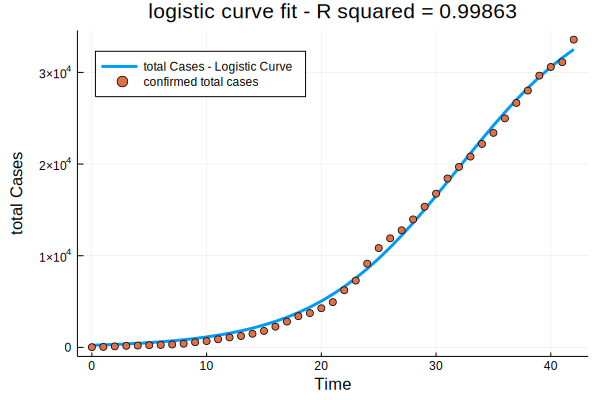

In [27]:
# plot the fitted Logistic curve with the actual data

function plotLC(LCFit::Dict{String,Any},data,weights,tspan,Rinf)
    lcparams = LCFit["parameters"]
    Rsq = LCFit["R squared"]
    n = length(data)
    xdata = collect(0:n-1)
    ydata = data
    l = length(lcparams)
    lc(x, p) = p[1]./(1 .+p[2]*exp.(-x*p[3]))
    if l == 3
        lcCm = lc(xdata,lcparams)
    else
        lcCm = lc(xdata,[Rinf,lcparams[1],lcparams[2]])
    end
    gr()
    plot(xdata,lcCm,xlabel="Time",ylabel="total Cases",label = "total Cases - Logistic Curve", lw = 3,legend=:topleft)
    RR = round(Rsq; digits=5)
    title!("logistic curve fit - R squared = $RR")
    plot!(xdata, ydata, seriestype = :scatter,label = "confirmed total cases")   
end

plotLC(LCFit,tC,www,120.0,[])

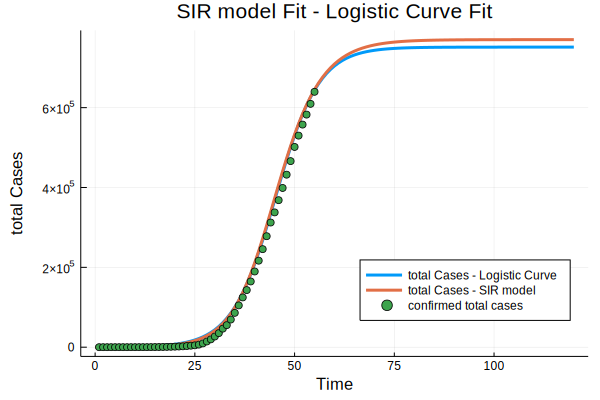

In [12]:
# compare fits between SIR and logistic model

function compareFits(SIRFit,LCFit,tC)
    # plots total cases implied by the  SIR model and by the logistic curve
    tCm = SIRFit[2,:] + SIRFit[3,:]
    Rinf = tCm[end]
    n = length(tCm)
    lcparams = LCFit["parameters"]
    Rsq = LCFit["R squared"]

    xdata = collect(0:n-1)
    ydata = tCm
    l = length(lcparams)
    lc(x, p) = p[1]./(1 .+p[2]*exp.(-x*p[3]))
    if l == 3
        lcCm = lc(xdata,lcparams)
    else
        lcCm = lc(xdata,[Rinf,lcparams[1],lcparams[2]])
    end
    gr()
    plot(xdata,lcCm,xlabel="Time",ylabel="total Cases",label = "total Cases - Logistic Curve", lw = 3,legend=:bottomright)
    title!("SIR model Fit - Logistic Curve Fit")
    plot!(xdata, ydata, label = "total Cases - SIR model", lw = 3)   
    plot!(tC, seriestype = :scatter,label = "confirmed total cases")
end

compareFits(sir_sol2,LCFit,tC)